In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
data = pd.read_csv("/content/sample_data/mission_3")

In [ ]:
data.head(10)

,Brand,Model Year,Mileage (miles),Fuel Type,Condition,Transmission,Resale Price
0,Ford,2009,148946,Electric,2,Automatic,22570
1,BMW,2020,158471,Electric,3,Automatic,19312
2,Ford,2005,112450,Diesel,2,Automatic,14972
3,Honda,2013,117547,Gasoline,4,Manual,25714
4,Honda,2016,55108,Diesel,4,Automatic,21456
5,Ford,2008,187479,Diesel,5,Manual,28403
6,Toyota,2021,95272,Electric,3,Manual,16683
7,Ford,2016,49064,Gasoline,1,Manual,5627
8,Honda,2010,75271,Diesel,1,Automatic,4105
9,Honda,2005,117893,Diesel,4,Manual,11580


In [ ]:
data.isnull().sum()

,0
Brand,0
Model Year,0
Mileage (miles),0
Fuel Type,0
Condition,0
Transmission,0
Resale Price,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Brand            1000 non-null   object
 1   Model Year       1000 non-null   int64 
 2   Mileage (miles)  1000 non-null   int64 
 3   Fuel Type        1000 non-null   object
 4   Condition        1000 non-null   int64 
 5   Transmission     1000 non-null   object
 6   Resale Price     1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [ ]:
le = {}
encoding_cols = ['Brand', 'Fuel Type', 'Transmission']
for col in encoding_cols:
  le[col] = LabelEncoder()
  data[col] = le[col].fit_transform(data[col])
print(le)




{'Brand': LabelEncoder(), 'Fuel Type': LabelEncoder(), 'Transmission': LabelEncoder()}


In [ ]:
data.head()

,Brand,Model Year,Mileage (miles),Fuel Type,Condition,Transmission,Resale Price
0,2,2009,148946,1,2,0,22570
1,0,2020,158471,1,3,0,19312
2,2,2005,112450,0,2,0,14972
3,3,2013,117547,2,4,1,25714
4,3,2016,55108,0,4,0,21456


In [ ]:
scale_cols = ['Model Year',	'Mileage (miles)', 'Condition']
scaler = MinMaxScaler()
data[scale_cols] = scaler.fit_transform(data[scale_cols])

In [ ]:
data.head(15)

,Brand,Model Year,Mileage (miles),Fuel Type,Condition,Transmission,Resale Price
0,2,0.428571,0.743932,1,0.25,0,22570
1,0,0.952381,0.794159,1,0.50,0,19312
2,2,0.238095,0.551480,0,0.25,0,14972
3,3,0.619048,0.578358,2,0.75,1,25714
4,3,0.761905,0.249102,0,0.75,0,21456
5,2,0.380952,0.947125,0,1.00,1,28403
6,4,1.000000,0.460896,1,0.50,1,16683
7,2,0.761905,0.217231,2,0.00,1,5627
8,3,0.476190,0.355426,0,0.00,0,4105
9,3,0.238095,0.580182,0,0.75,1,11580


In [ ]:
# # prompt: make oversampling for data  with path /content/sample_data/Worksheet in C  Users abdel Downloads AMHM-ITAI-03.csv to be 1 thousand row

# import pandas as pd
# from sklearn.utils import resample

# # Load the data (replace with the actual path)
# try:
#   data = pd.read_csv("/content/sample_data/Worksheet in C  Users abdel Downloads AMHM-ITAI-03.csv")
# except FileNotFoundError:
#   print("Error: File not found. Please provide the correct file path.")
#   # You might want to exit the script or handle the error differently
#   exit()


# # Separate majority and minority classes
# # Assuming 'Class' is the column you want to oversample. Replace if necessary.
# if 'Resale Price' not in data.columns:
#     print("Error: 'Class' column not found in the DataFrame. Please specify the correct column name for oversampling.")
#     exit()

# # Identify minority class
# minority_class = data['Resale Price'].value_counts().idxmin()
# minority_data = data[data['Resale Price'] == minority_class]

# # Oversample minority class to 1000 rows
# oversampled_minority = resample(minority_data, replace=True, n_samples=1000, random_state=123)


# # Concatenate the oversampled minority class with the original data
# data_oversampled = pd.concat([data, oversampled_minority])
# data_oversampled.to_csv("/content/sample_data/mission 3.csv", index=False)
# # Check the new class distribution
# print(data_oversampled['Resale Price'].value_counts())

# # Now data_oversampled contains the oversampled data

In [ ]:
data.describe()

,Brand,Model Year,Mileage (miles),Fuel Type,Condition,Transmission,Resale Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.029000,0.442238,0.493318,0.932000,0.529250,0.464000,16783.906000
std,1.362356,0.299797,0.292928,0.828289,0.360155,0.498952,8686.868036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2504.000000
25%,1.000000,0.190476,0.234052,0.000000,0.250000,0.000000,8588.000000
50%,2.000000,0.380952,0.515828,1.000000,0.500000,0.000000,17485.000000
75%,3.000000,0.666667,0.691395,2.000000,0.750000,1.000000,24756.250000
max,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,29870.000000


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

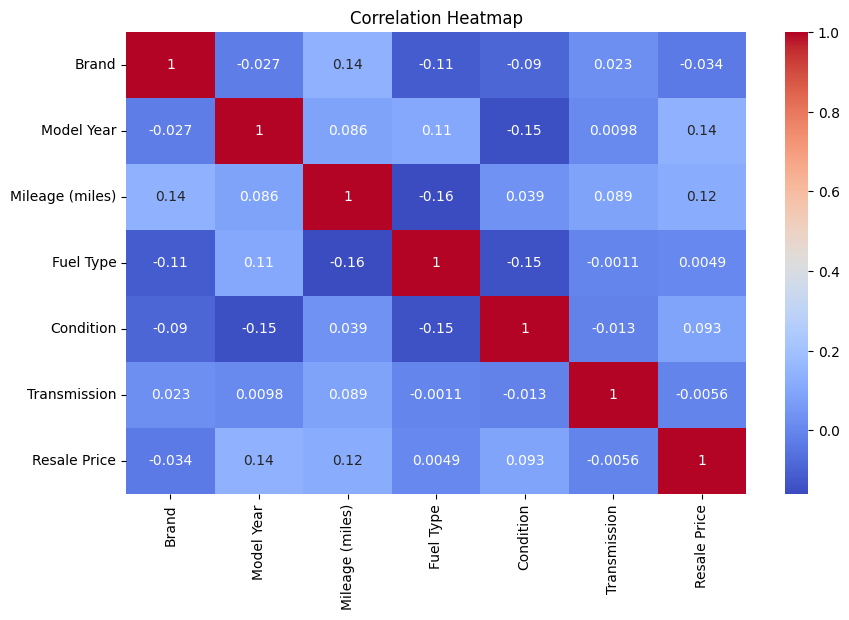

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt

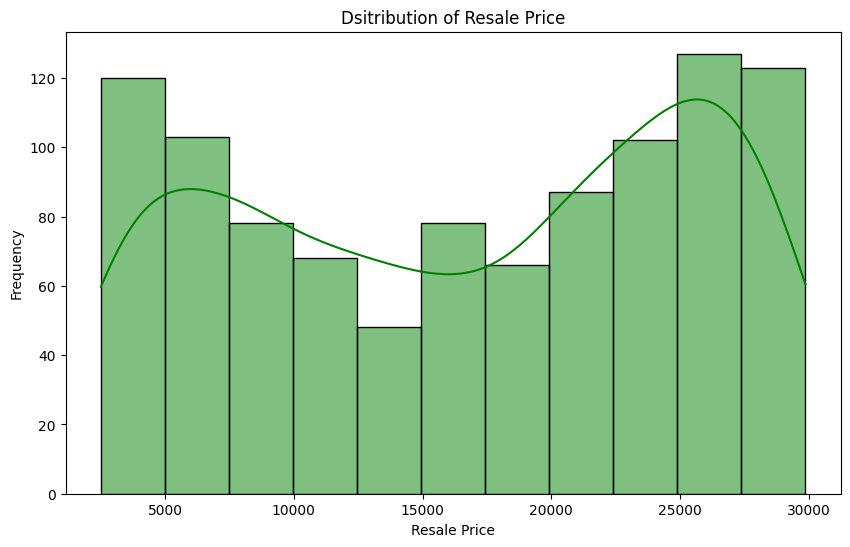

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Resale Price'], kde=True, color="Green")
plt.title('Dsitribution of Resale Price')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

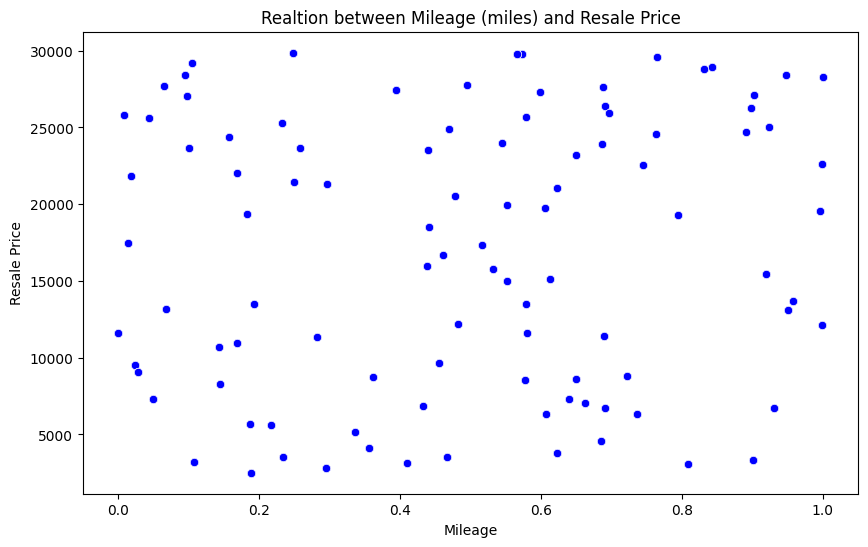

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Mileage (miles)'],y=data['Resale Price'], color="Blue")
plt.title('Realtion between Mileage (miles) and Resale Price')
plt.ylabel('Resale Price')
plt.xlabel('Mileage')
plt.show()

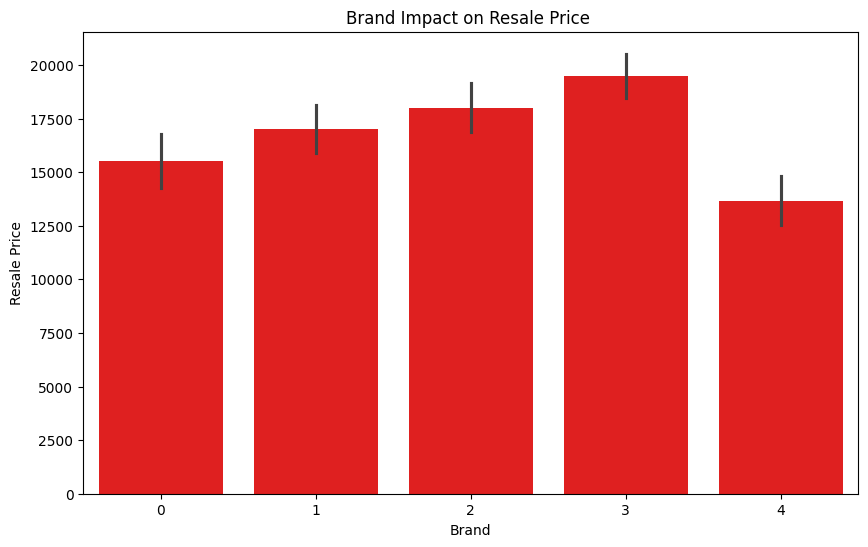

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Brand'],y=data['Resale Price'], color="red")
plt.title('Brand Impact on Resale Price ')
plt.xlabel('Brand')
plt.ylabel('Resale Price')
plt.show()

In [ ]:
x = data.drop('Resale Price', axis=1)
y = data['Resale Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x

,Brand,Model Year,Mileage (miles),Fuel Type,Condition,Transmission
0,2,0.428571,0.743932,1,0.25,0
1,0,0.952381,0.794159,1,0.50,0
2,2,0.238095,0.551480,0,0.25,0
3,3,0.619048,0.578358,2,0.75,1
4,3,0.761905,0.249102,0,0.75,0
...,...,...,...,...,...,...
995,0,0.428571,0.043462,0,0.25,0
996,3,0.190476,0.393573,2,0.00,0
997,3,0.476190,0.763822,1,0.00,1
998,1,0.761905,0.613024,2,0.25,0


In [ ]:
y

,Resale Price
0,22570
1,19312
2,14972
3,25714
4,21456
...,...
995,25625
996,27470
997,29569
998,15116


In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)


In [ ]:
print("MAE for Lr:", mean_absolute_error(y_test, y_pred_lr))
print("MAE for dt:", mean_absolute_error(y_test, y_pred_dt))
print("MAE for RF:", mean_absolute_error(y_test, y_pred_rf))


MAE for Lr: 7722.679898278405
MAE for dt: 0.0
MAE for RF: 55.37094999999999


In [ ]:
print("MsE for Lr:", mean_squared_error(y_test, y_pred_lr))
print("MsE for dt:", mean_squared_error(y_test, y_pred_dt))
print("MsE for RF:", mean_squared_error(y_test, y_pred_rf))


MsE for Lr: 73958359.27137384
MsE for dt: 0.0
MsE for RF: 56140.84923550002


In [ ]:
print("R2 Score for Lr:", r2_score(y_test, y_pred_lr))
print("R2 Score for dt:", r2_score(y_test, y_pred_dt))
print("R2 Score for RF:", r2_score(y_test, y_pred_rf))


R2 Score for Lr: 0.02408389484532769
R2 Score for dt: 1.0
R2 Score for RF: 0.9992591945053169


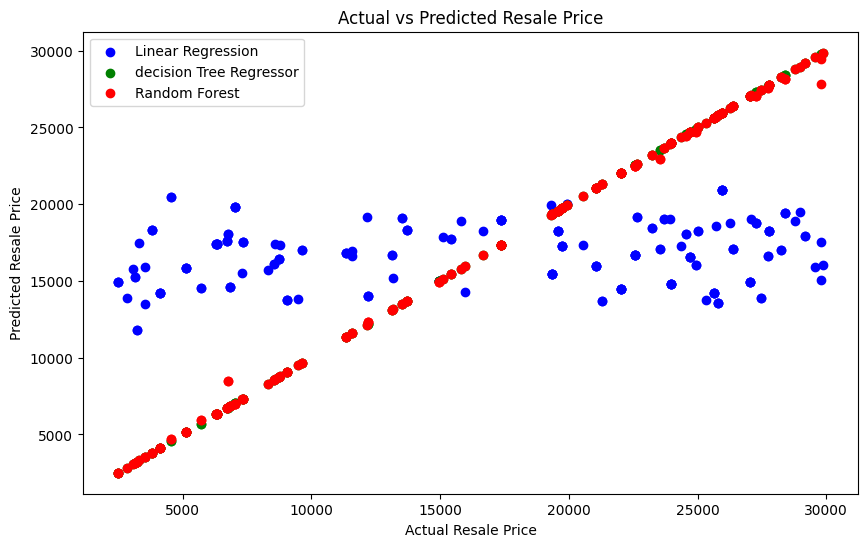

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color="blue", label = "Linear Regression")
plt.scatter(y_test, y_pred_dt, color="green", label = "decision Tree Regressor")
plt.scatter(y_test, y_pred_rf, color="red", label = "Random Forest")
plt.xlabel("Actual Resale Price")
plt.ylabel("Predicted Resale Price")
plt.title("Actual vs Predicted Resale Price")
plt.legend()
plt.show()


In [ ]:
grid_param = {
    'max_depth': [10,20,30,5,15,25,35], 'max_leaf_nodes': [5,7,10,15,20,24]
    }
grid_model = GridSearchCV(DecisionTreeRegressor(), grid_param, cv=5)
grid_model.fit(x_train, y_train)
print(grid_model.best_params_)

{'max_depth': 10, 'max_leaf_nodes': 24}


In [ ]:
y_predict_grid = grid_model.best_estimator_.predict(x_test)
print("MAE for Grid:", mean_absolute_error(y_test, y_predict_grid))
print("MSE for Grid:", mean_squared_error(y_test, y_predict_grid))
print("r2 score for Grid:", r2_score(y_test, y_predict_grid))


MAE for Grid: 3015.926376209966
MSE for Grid: 16077007.958453264
r2 score for Grid: 0.7878561511649537


In [ ]:
random_param = {
    'max_depth': [10,20,30,5,15,25,35], 'n_estimators': [100,200,300,350,250,50]
}
random_model = RandomizedSearchCV(RandomForestRegressor(), random_param, cv=5)
random_model.fit(x_train, y_train)
print(random_model.best_params_)

{'n_estimators': 100, 'max_depth': 35}


In [ ]:
y_predict_rf = random_model.best_estimator_.predict(x_test)
print("MAE for Random:", mean_absolute_error(y_test, y_predict_rf))
print("MSE for Random:", mean_squared_error(y_test, y_predict_rf))
print("r2 score for Random:", r2_score(y_test, y_predict_rf))

MAE for Random: 51.596100000000035
MSE for Random: 38167.40534400004
r2 score for Random: 0.9994963627379766


In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
data.columns

Index(['Brand', 'Model Year', 'Mileage (miles)', 'Fuel Type', 'Condition',
       'Transmission', 'Resale Price'],
      dtype='object')

In [ ]:
import gradio as gr
def predict_resale_price(brand, model_year, miles, condition, fuel_type, transmission):
  try:
    input_data = pd.DataFrame({
        'Brand': [brand],
        'Model Year': [model_year],
        'Mileage (miles)': [miles],
        'Fuel Type': [fuel_type],
        'Condition': [condition],
        'Transmission': [transmission]
    })
    for col in encoding_cols:
      input_data[col] = le[col].transform(input_data[col])
    input_data[scale_cols] = scaler.transform(input_data[scale_cols])
    predict = random_model.best_estimator_.predict(input_data)
    return f"Predicted Resale Price: ${predict[0]:,.2f}"
  except Exception as e:
    return f"Error: {e}"
gr.Interface(
    fn=predict_resale_price,
    inputs=[
        gr.Dropdown(['Ford', 'BMW', 'Honda', 'Chevrolet', 'Toyota'], label="Brand"),
        gr.Number(label="Model Year"),
        gr.Number(label="Mileage (miles)"),
        gr.Number(label="Condition (1-5)"),
        gr.Dropdown(['Gasoline', 'Diesel', 'Electric'], label="Fuel Type"),
        gr.Dropdown(['Manual', 'Automatic'], label="Transmission")
    ],
    outputs = gr.Textbox(label="Predicted Resale Price"),
    title="Resale Price Prediction"
).launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e12e6b83f8012dcb1d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
